## Rosenblatt's Perceptron Learning Algorithm (1958)

**pp.129**

**idea** Perceptron computes a linear combination of the input features and return the sign {-1, 1}.

**description** Perceptron learns a separating hyperplane by minimizing the distance of misclassified points to the  hyperplane (decision boundary).

**Highlights** <br/>
- If the training data are linear separable, perceptron converges to a separating hyperplane in a finite number of steps. And there are many solutions, and which one is found depends on the starting values / initialisation ($w_0, b_0$) and the choices of misclassified points.
- The “finite” number of steps to convergence can be very large. <u>The smaller the gap (gap where the separating hyperplanes fall in), the longer the time to find it (the hyperplane).</u> (*How to tackle this problem? Find a hyperplane **in a much enlarged space** obtained by creating many basis-function transformations of the original variables. pp.132(**Not clear**)*)
- If the data are not linear separable, this algorithm won't converge.

**Input** <br/>
Training data $T=\{(x_1, y_1),...(x_N,y_N)\}$, where $x_i \in \mathcal{X} \subseteq \mathbb{R}^n$, and $y_i \in \mathcal{Y} = \{-1, 1\}$ are the classes$

**Model** <br/>
$f(x) = sign(w \cdot x+b )$

**Output** <br/>
$w, b$

**Loss function** <br/>
$\min\limits_{w,b}L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i+b)$, where $M$ is the set of misclassified points.  If all data can be classified correctly, the loss is 0.

**gradient** <br/>
$\frac{\partial L(w,b)}{\partial w} = -y_ix_i$<br/>
$\frac{\partial L(w,b)}{\partial b} = -y_i$

**gradient descent**<br/>
$w := w + \alpha \cdot y_ix_i$<br/>
$b := b + \alpha \cdot y_i$
Here $\alpha \in (0,1]$ is the learning rate. In the following code, $\alpha$ is set as 1.

$\begin{pmatrix} w \\ b \end{pmatrix} \leftarrow \begin{pmatrix} w \\ b \end{pmatrix} + \alpha \begin{pmatrix} y_ix_i\\ y_i \end{pmatrix}$

**Algorithm** <br/>
1. Initialise $w_0$ and $b_0$
2. Choose a $(x_i, y_i)$, if $y_i(w \cdot x_i+b) \leq 0$, update $w$ and $b$
3. Repeat step 2, until $L(w,b)=0$

**Questions on 07-11-2019**
1. If observations from two different classes share the same input, how to make the code workable for dealing with this situation? For example, `X = np.array([[3,3],[3,4],[1,1],[1,1]])`, `y = np.array([1,1,-1,1])`.
2. How to "Find a hyperplane in a much enlarged space obtained by creating many basis-function transformations of the original variables"? This is analogous to driving the residuals in a polynomial regression problem down to zero by making the degree sufficiently large (pp.132).

### Implementation of Rosenblatt's Perceptron Algorithm
An example: 
$x_1=(3,4), y_1=-1$; $x_2=(3,3), y_2=-1$; $x_3=(1,1), y_1=1$

**注意flag的使用**

[参考：类的写法](https://blog.csdn.net/cracker180/article/details/78778305)

In [27]:
import numpy as np
# training data
X = np.array([[3,3],[3,4],[1,1]])  # N*D: (3,2)
y = np.array([1,1,-1])  # N, : (3,)

# X = np.array([[3,3],[3,4],[1,1],[1,1]])  # N*D: (3,2)
# y = np.array([1,1,-1,1])  # N, : (3,)

def perceptron(X, y, learning_rate=1):
    # initialise w0, b0
    w = np.random.randint(10, size=(X.shape[1],1))  # (D, 1)
    b = 0 # scalar

    # gradient descent
    flag = True
    while flag:
        counter = 0
        for i in range(len(X)):
            if y[i]*(np.sum(w.transpose()*X[i])+b) <= 0:
                w = w + learning_rate*(y[i]*X[i]).reshape(w.shape)
                b = b + learning_rate*y[i]
                counter += 1
        if counter == 0:
            flag = False
    return w, b

2


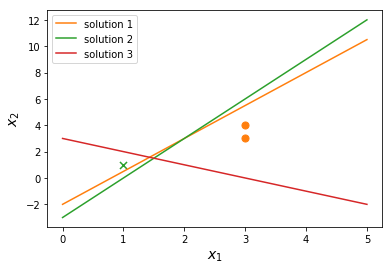

In [28]:
import matplotlib.pyplot as plt
plt.figure(1)  
plt.title('', size=14)  
plt.xlabel('$x_1$', size=14)  
plt.ylabel('$x_2$', size=14)

for i in np.where(y==1)[0]:
    plt.scatter(X[i][0],X[i][1],c='C1',s=50)  
for j in np.where(y==-1)[0]:
    print(j)
    plt.scatter(X[j][0],X[j][1],c='C2', marker='x',s=50)

xData = np.linspace(0, 5, 100)

for i in range(3):
    w, b = perceptron(X, y)
    yData = (-b - w[0]*xData)/w[1]    
    plt.plot(xData, yData, color='C%d'%(i+1), label='solution %d'%(i+1))
plt.legend()
plt.show()